<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('images dataset/hammad/hammad (2).jpeg')
img.shape

(594, 585, 3)

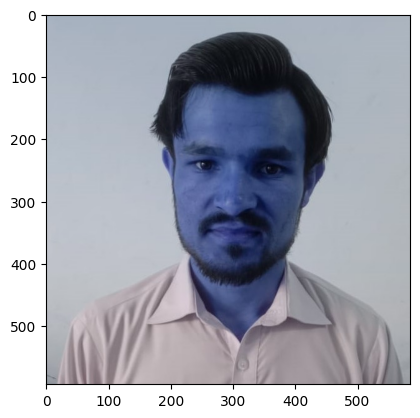

In [3]:
plt.imshow(img)

***converting to gray img***

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(594, 585)

In [5]:
gray

array([[182, 182, 182, ..., 183, 183, 183],
       [182, 182, 182, ..., 183, 183, 183],
       [182, 182, 182, ..., 183, 183, 183],
       ...,
       [150, 150, 151, ..., 159, 160, 159],
       [148, 149, 150, ..., 160, 160, 160],
       [148, 149, 150, ..., 160, 160, 160]], dtype=uint8)

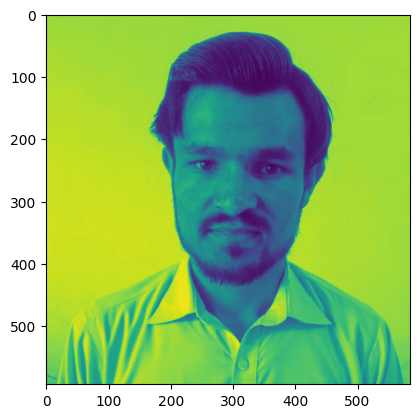

In [12]:
plt.imshow(gray)

In [7]:
#cv2.imshow("Image",img) this is not running

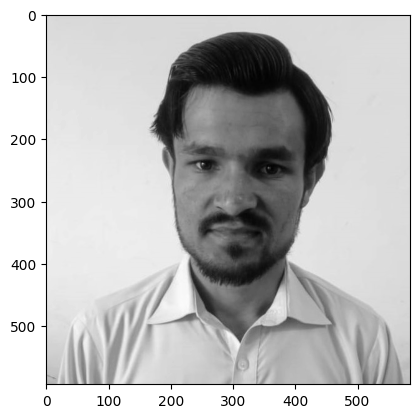

In [7]:
plt.imshow(gray, cmap='gray')

***face and eye detection***

In [9]:
face_cascade=cv2.CascadeClassifier(r'opencv_haarcascades\haarcascade_frontalface_default.xml')

In [13]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[170, 136, 270, 270]])

In [14]:
(x,y,w,h) = faces[0]
x,y,w,h

(170, 136, 270, 270)

In [5]:
face_img=img.copy()

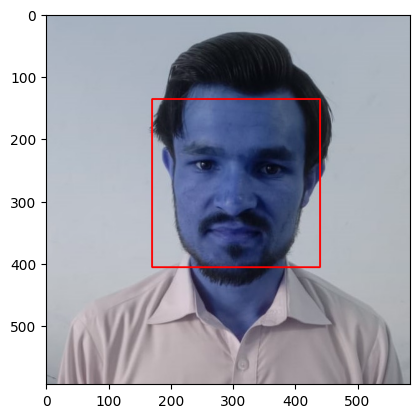

In [15]:
face_img = cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [16]:
for (x,y,w,h) in faces:
    face_img=img.copy()
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

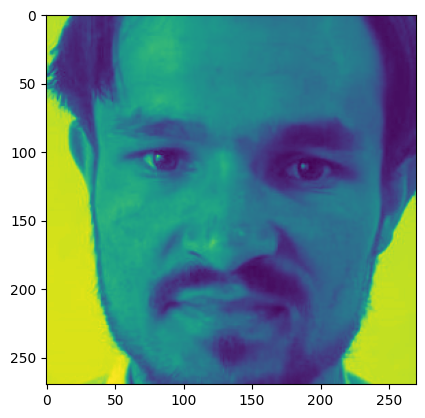

In [19]:
plt.imshow(roi_gray)

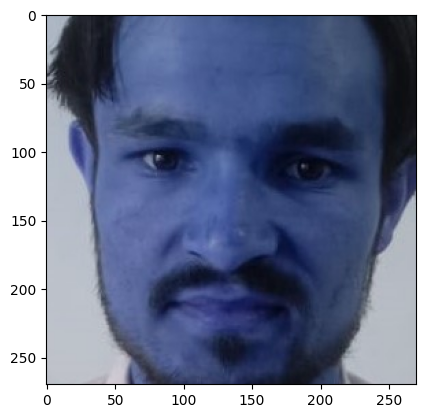

In [20]:
plt.imshow(roi_color)

In [21]:
eye_cascade =cv2.CascadeClassifier(r'opencv_haarcascades\haarcascade_eye.xml')

***applied on whole image***

In [22]:
eyes=eye_cascade.detectMultiScale(gray)
eyes

array([[223, 214,  55,  55],
       [328, 344,  22,  22],
       [244, 331,  35,  35],
       [330, 340,  31,  31],
       [333, 221,  55,  55],
       [229, 389,  71,  71]])

***eyes detection of whole picture***

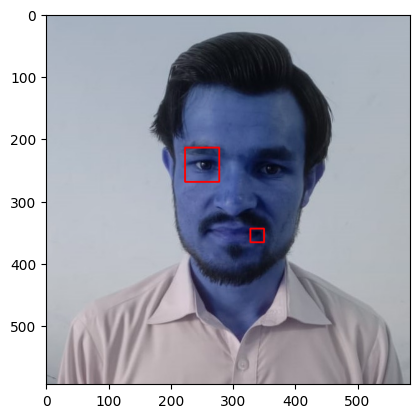

In [23]:
(x,y,w,h) = eyes[0]
(a,b,c,d) = eyes[1]
eye_img=img.copy()
eye_img = cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,0,0),2)
eye_img = cv2.rectangle(eye_img,(a,b),(a+c,b+d),(255,0,0),2)
plt.imshow(eye_img)

***applied on cropped image***

In [19]:
eyes_=eye_cascade.detectMultiScale(roi_gray, 1.1, 5)

In [20]:
eyes_

array([[ 69, 182,  47,  47],
       [ 53,  78,  55,  55],
       [164,  85,  55,  55]])

***eyes detection of cropped picture***

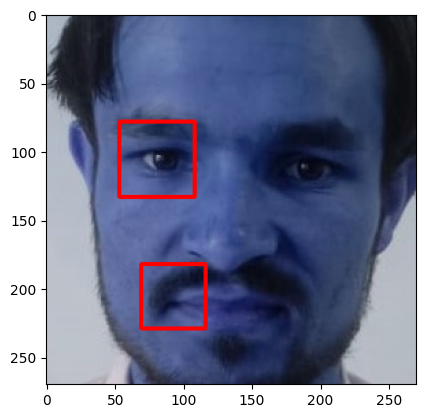

In [21]:
(x,y,w,h) = eyes_[0]
(a,b,c,d) = eyes_[1]
eye_img=roi_color.copy()
eye_img = cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,0,0),2)
eye_img2 = cv2.rectangle(eye_img,(a,b),(a+c,b+d),(255,0,0),2)
plt.imshow(eye_img2)

***face and eyes detection of whole picture simultanously***

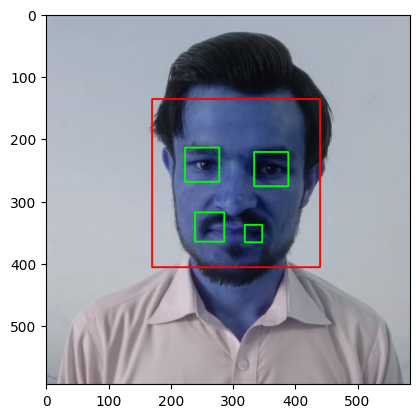

In [22]:
for (x,y,w,h) in faces:
    face_img=img.copy()
    face_img = cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

***making function for getting cropped image if face with 2 eyes are detected***

In [62]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            cv2.imwrite('Cropped_images/'+image_path.split('\\')[1]+'\\'+image_path.split('\\')[-1],roi_color)
            return roi_color

***passing an image to  get_cropped_image_if_2_eyes(image_path) function for getting cropped image if face with 2 eyes are detected***

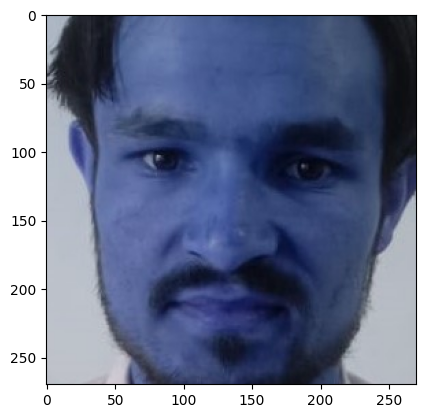

In [54]:
cropped_image = get_cropped_image_if_2_eyes('images dataset/hammad/hammad (2).jpeg')
plt.imshow(cropped_image)

In [47]:
from os import walk

# folder path
dir_path = 'images dataset'

# list to store files name
res = []
for (dir_path, dir_names, file_names) in walk(dir_path):
    print(dir_path)
    # res.extend(file_names)
# print(res)

images dataset
images dataset\hammad
images dataset\Not_hammad


In [42]:
len(res)

39

In [48]:
import os

def list_files_in_directory(directory):
    file_list = []
    
    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Get the full path of the file
            file_path = os.path.join(root, filename)
            file_list.append(file_path)
    
    return file_list

# Example usage:
directory_path = 'images dataset'
file_paths = list_files_in_directory(directory_path)

for file_path in file_paths:
    print(file_path)
# Replace /path/to/your/directory with the path to the directory for which you want to generate the list of file paths. When you call list_files_in_directory(directory_path), it will return a list containing the file paths of all the files within the specified directory and its subdirectories. You can then use this list as needed in your application.







images dataset\hammad\hammad (2).jpeg
images dataset\hammad\hammad.jpeg
images dataset\hammad\hammad.jpg
images dataset\hammad\hammad2.jpeg
images dataset\hammad\hammad2.jpg
images dataset\hammad\hammad3.jpg
images dataset\hammad\IMG-20211025-WA0156.jpg
images dataset\hammad\IMG-20211104-WA0001.jpg
images dataset\hammad\IMG_20200524_134502.jpg
images dataset\hammad\IMG_20200805_182919.jpg
images dataset\hammad\IMG_20200805_183015.jpg
images dataset\hammad\IMG_20200805_183159.jpg
images dataset\hammad\IMG_20200806_135328_576.jpg
images dataset\hammad\IMG_20220413_192148.jpg
images dataset\hammad\IMG_9355.JPG
images dataset\hammad\WIN_20200703_15_22_42_Pro.jpg
images dataset\hammad\WIN_20200703_15_28_12_Pro.jpg
images dataset\hammad\WIN_20200703_15_29_12_Pro.jpg
images dataset\Not_hammad\IMG-20211025-WA0042.jpg
images dataset\Not_hammad\IMG-20211025-WA0045.jpg
images dataset\Not_hammad\IMG-20211025-WA0052.jpg
images dataset\Not_hammad\IMG-20211025-WA0062.jpg
images dataset\Not_hammad\IMG

In [49]:
len(file_paths)

39

In [64]:
i=0
for file_path in file_paths:
    cropped=get_cropped_image_if_2_eyes(file_path)
        
        
    